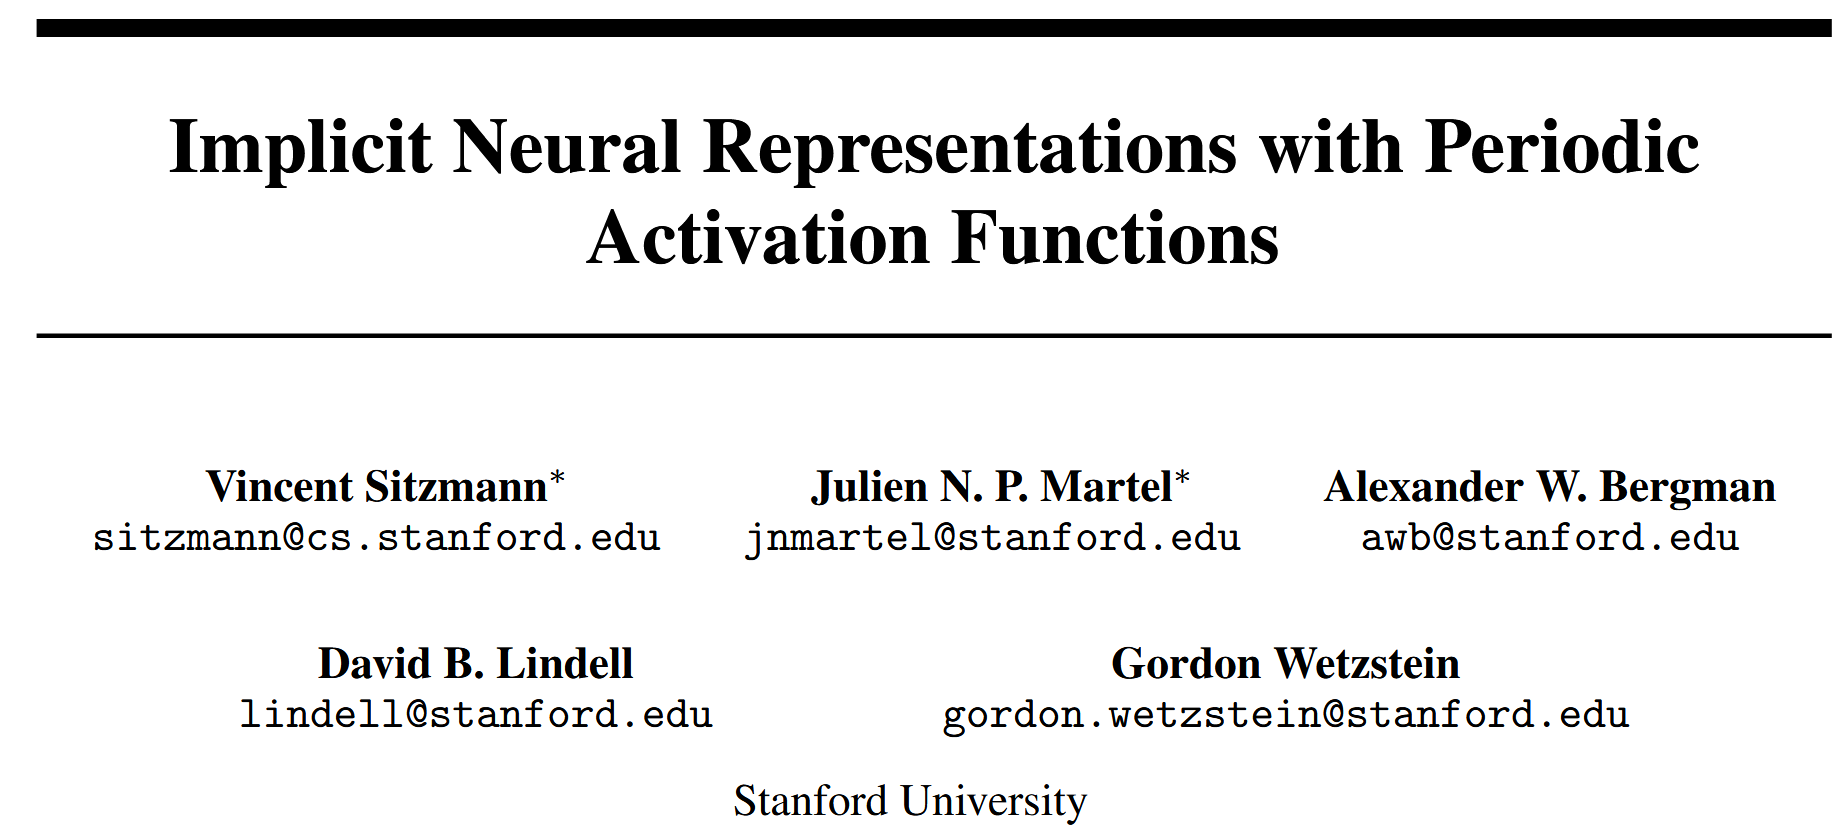
code: https://vsitzmann.github.io/siren/

In [ ]:
# Implicit Neural Representations with Periodic Activation Functions  
**Vincent Sitzmann, Julien N. P. Martel, Alexander W. Bergman, David B. Lindell, Gordon Wetzstein**  
Stanford University  
Preprint, arXiv:2006.09661 (2020)  

---

## 1. Background

How to represent a signal is a fundamental question across science and engineering.  
Traditional representations are typically discrete, such as pixel grids for images or voxel grids for 3D shapes.  
However, these discrete formats suffer from issues like high memory usage, limited resolution, and difficulty in computing derivatives.

Recently, **implicit neural representations (INRs)** have emerged as a powerful alternative.  
Instead of storing signals explicitly, they use neural networks to map coordinates $x$ (e.g., spatial or spatiotemporal) directly to signal values $\Phi(x)$.

For example, in many physical problems, we aim to learn a function $\Phi$ that satisfies:

$$
F(x, \Phi(x), \nabla_x \Phi(x), \nabla^2_x \Phi(x), \ldots) = 0
\tag{1}
$$

This includes problems in physics, imaging, graphics, and differential equations.

Most existing INR methods are built on ReLU-based MLPs. While these can fit low-frequency components, they **struggle with high-frequency signals** and **fail to represent higher-order derivatives** well — which are essential for many physical systems.

---

## 2. The Core Idea

This paper introduces **SIREN (Sinusoidal Representation Networks)**, a neural network architecture that uses the sine function as its activation:

$$
\phi_i(x_i) = \sin(W_i x_i + b_i)
$$

A full SIREN network is:

$$
\Phi(x) = W_n \cdot (\phi_{n-1} \circ \phi_{n-2} \circ \cdots \circ \phi_0)(x) + b_n
\tag{4}
$$

The key advantage is that **any derivative of a sine is also a sine or cosine**, which preserves expressiveness through derivatives.  
This makes SIREN particularly powerful for modeling natural signals **and** their derivatives — such as gradients and Laplacians.

They define a general optimization objective to solve constraint problems of the form:

$$
\text{Find } \Phi(x) \text{ such that } C_m(a(x), \Phi(x), \nabla \Phi(x), \ldots) = 0, \quad \forall x \in \Omega_m,\ m=1,\ldots,M
\tag{2}
$$

The corresponding loss function is:

$$
\mathcal{L} = \int_\Omega \sum_{m=1}^M \mathbf{1}_{\Omega_m}(x) \left\| C_m(a(x), \Phi(x), \nabla \Phi(x), \ldots) \right\| dx
\tag{3}
$$

The authors further propose a **principled initialization scheme** for SIREN:

- Weights $W_i$ are sampled from $U\left(-\sqrt{\frac{6}{n}}, \sqrt{\frac{6}{n}}\right)$
- The first layer uses a higher frequency $\omega_0 = 30$ to match the spectrum of natural signals

This ensures stability in training and allows SIRENs to scale deeper without vanishing or exploding gradients.

---

## 3. Contribution

The contributions of this paper can be summarized as follows:

- Introduced **SIREN**, a simple architecture using periodic activation functions to represent signals and their derivatives
- Proposed a **theoretically grounded initialization scheme** for sine activations, enabling deep stable models
- Demonstrated **high-fidelity representations** of images, videos, audio, and 3D shapes using SIRENs
- Showed that SIRENs can **solve partial differential equations (PDEs)** like Poisson, Helmholtz, and Eikonal equations directly from derivative supervision
- Combined SIRENs with **hypernetworks** to learn priors over implicit function spaces, enabling applications like image inpainting from sparse observations

---

## 4. References

1. Vincent Sitzmann et al., *Implicit Neural Representations with Periodic Activation Functions*, arXiv:2006.09661, 2020  
2. Ben Mildenhall et al., *NeRF: Representing Scenes as Neural Radiance Fields for View Synthesis*, arXiv:2003.08934  
3. Jeong Joon Park et al., *DeepSDF*, CVPR 2019  
4. Maziar Raissi et al., *Physics-informed Neural Networks*, JCP 2019  
5. David Ha et al., *Hypernetworks*, ICLR 2017  